In [112]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.kernel_regression import KernelReg
import statsmodels.api as sm
from scipy.stats import norm,lognorm

In [28]:
dataset, meta = pyreadstat.read_sav("Kerala_cnns.sav")

In [29]:
dataset.drop(['agemons','caseid','state','psu_no','psu_no_ov','hh_no','int_d','int_m','int_y','q103m','q103y','q111m','q111y','q113y','q113m','q305o','q902r1','q902r2','q903r1','q903r2','q904r1','q904r2','q905r1','q905r2','q906r1','q906r2','reg_weight_survey','reg_weight_bio','nat_weight_bio','nat_weight_survey'],axis=1,inplace=True)

In [30]:
dataset.head()

,area,region,q102,q104,q112,q114,q115,q116,q117,q118,...,bp_dysys1,bp_sys2,bp_dysys2,bp_sys3,bp_dysys3,wi,wi_s,state_weight_survey,state_weight_bio,fasting_status
0,1.0,5.0,2.0,11.0,36.0,1.0,991.0,3.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,4.0,2.0,0.595384,NaN,
1,1.0,5.0,1.0,17.0,44.0,1.0,991.0,3.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.414343,NaN,
2,1.0,5.0,2.0,15.0,42.0,1.0,991.0,3.0,1.0,16.0,...,72.0,109.0,70.0,112.0,74.0,5.0,5.0,0.414343,0.764629,YES
3,1.0,5.0,1.0,13.0,40.0,1.0,991.0,3.0,1.0,16.0,...,70.0,114.0,73.0,117.0,76.0,4.0,2.0,0.595384,0.743870,YES
4,1.0,5.0,1.0,16.0,42.0,1.0,991.0,4.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,5.0,3.0,0.414343,NaN,


In [31]:
print(dataset['state_weight_survey'].describe())

count    841.000000
mean       0.999750
std        0.526660
min        0.279890
25%        0.692629
50%        0.841817
75%        1.163728
max        4.639643
Name: state_weight_survey, dtype: float64


In [32]:
pd.set_option('display.max_rows',132)
print(dataset.isna().sum())

area                     0
region                   0
q102                     0
q104                     0
q112                     0
q114                     0
q115                     0
q116                     4
q117                     0
q118                    18
q125                     0
q201A                    0
q201B                    0
q201C                    0
q201D                    0
q201E                    0
q201F                    0
q201G                    0
q201H                    0
q201I                    0
q201J                    0
q201X                    0
q201Y                    0
q201o                    0
q301                     0
q302                   734
q303                     0
q304                     0
q305                   359
q306a                    0
q306b                    0
q306c                    0
q306d                    0
q306e                    0
q306f                    0
q306g                    0
q306h                    0
q

In [33]:
kerala_data = dataset.drop(dataset.columns[dataset.isna().sum()>420],axis=1)

In [34]:
variable_def = {item:meta.column_names_to_labels[item] for item in kerala_data.columns}

In [35]:
variable_def

{'area': 'Type of area',
 'region': 'Regions of India',
 'q102': 'q102: Sex of the respondent',
 'q104': "q104: Index child's age",
 'q112': 'q112. How old is your mother?',
 'q114': 'q114. What is your religion',
 'q115': 'q115: What is your caste or tribe',
 'q116': 'q116. Scheduled caste,scheduled tribe,other backward class,non-backward',
 'q117': 'q117. Did your mother ever attended school?',
 'q118': 'q118. What is the highest standard your mother completed?',
 'q125': 'q125. Have you  ever attended school?',
 'q201A': 'When it is important to wash hands with soap&water:Before cooking/handling food',
 'q201B': 'When it is important to wash hands with soap&water:After passing urine/stool',
 'q201C': 'When it is important to wash hands with soap&water:Before eating food',
 'q201D': 'When it is important to wash hands with soap&water:Before feeding infant',
 'q201E': 'When it is important to wash hands with soap&water:Before preparing food',
 'q201F': 'When it is important to wash ha

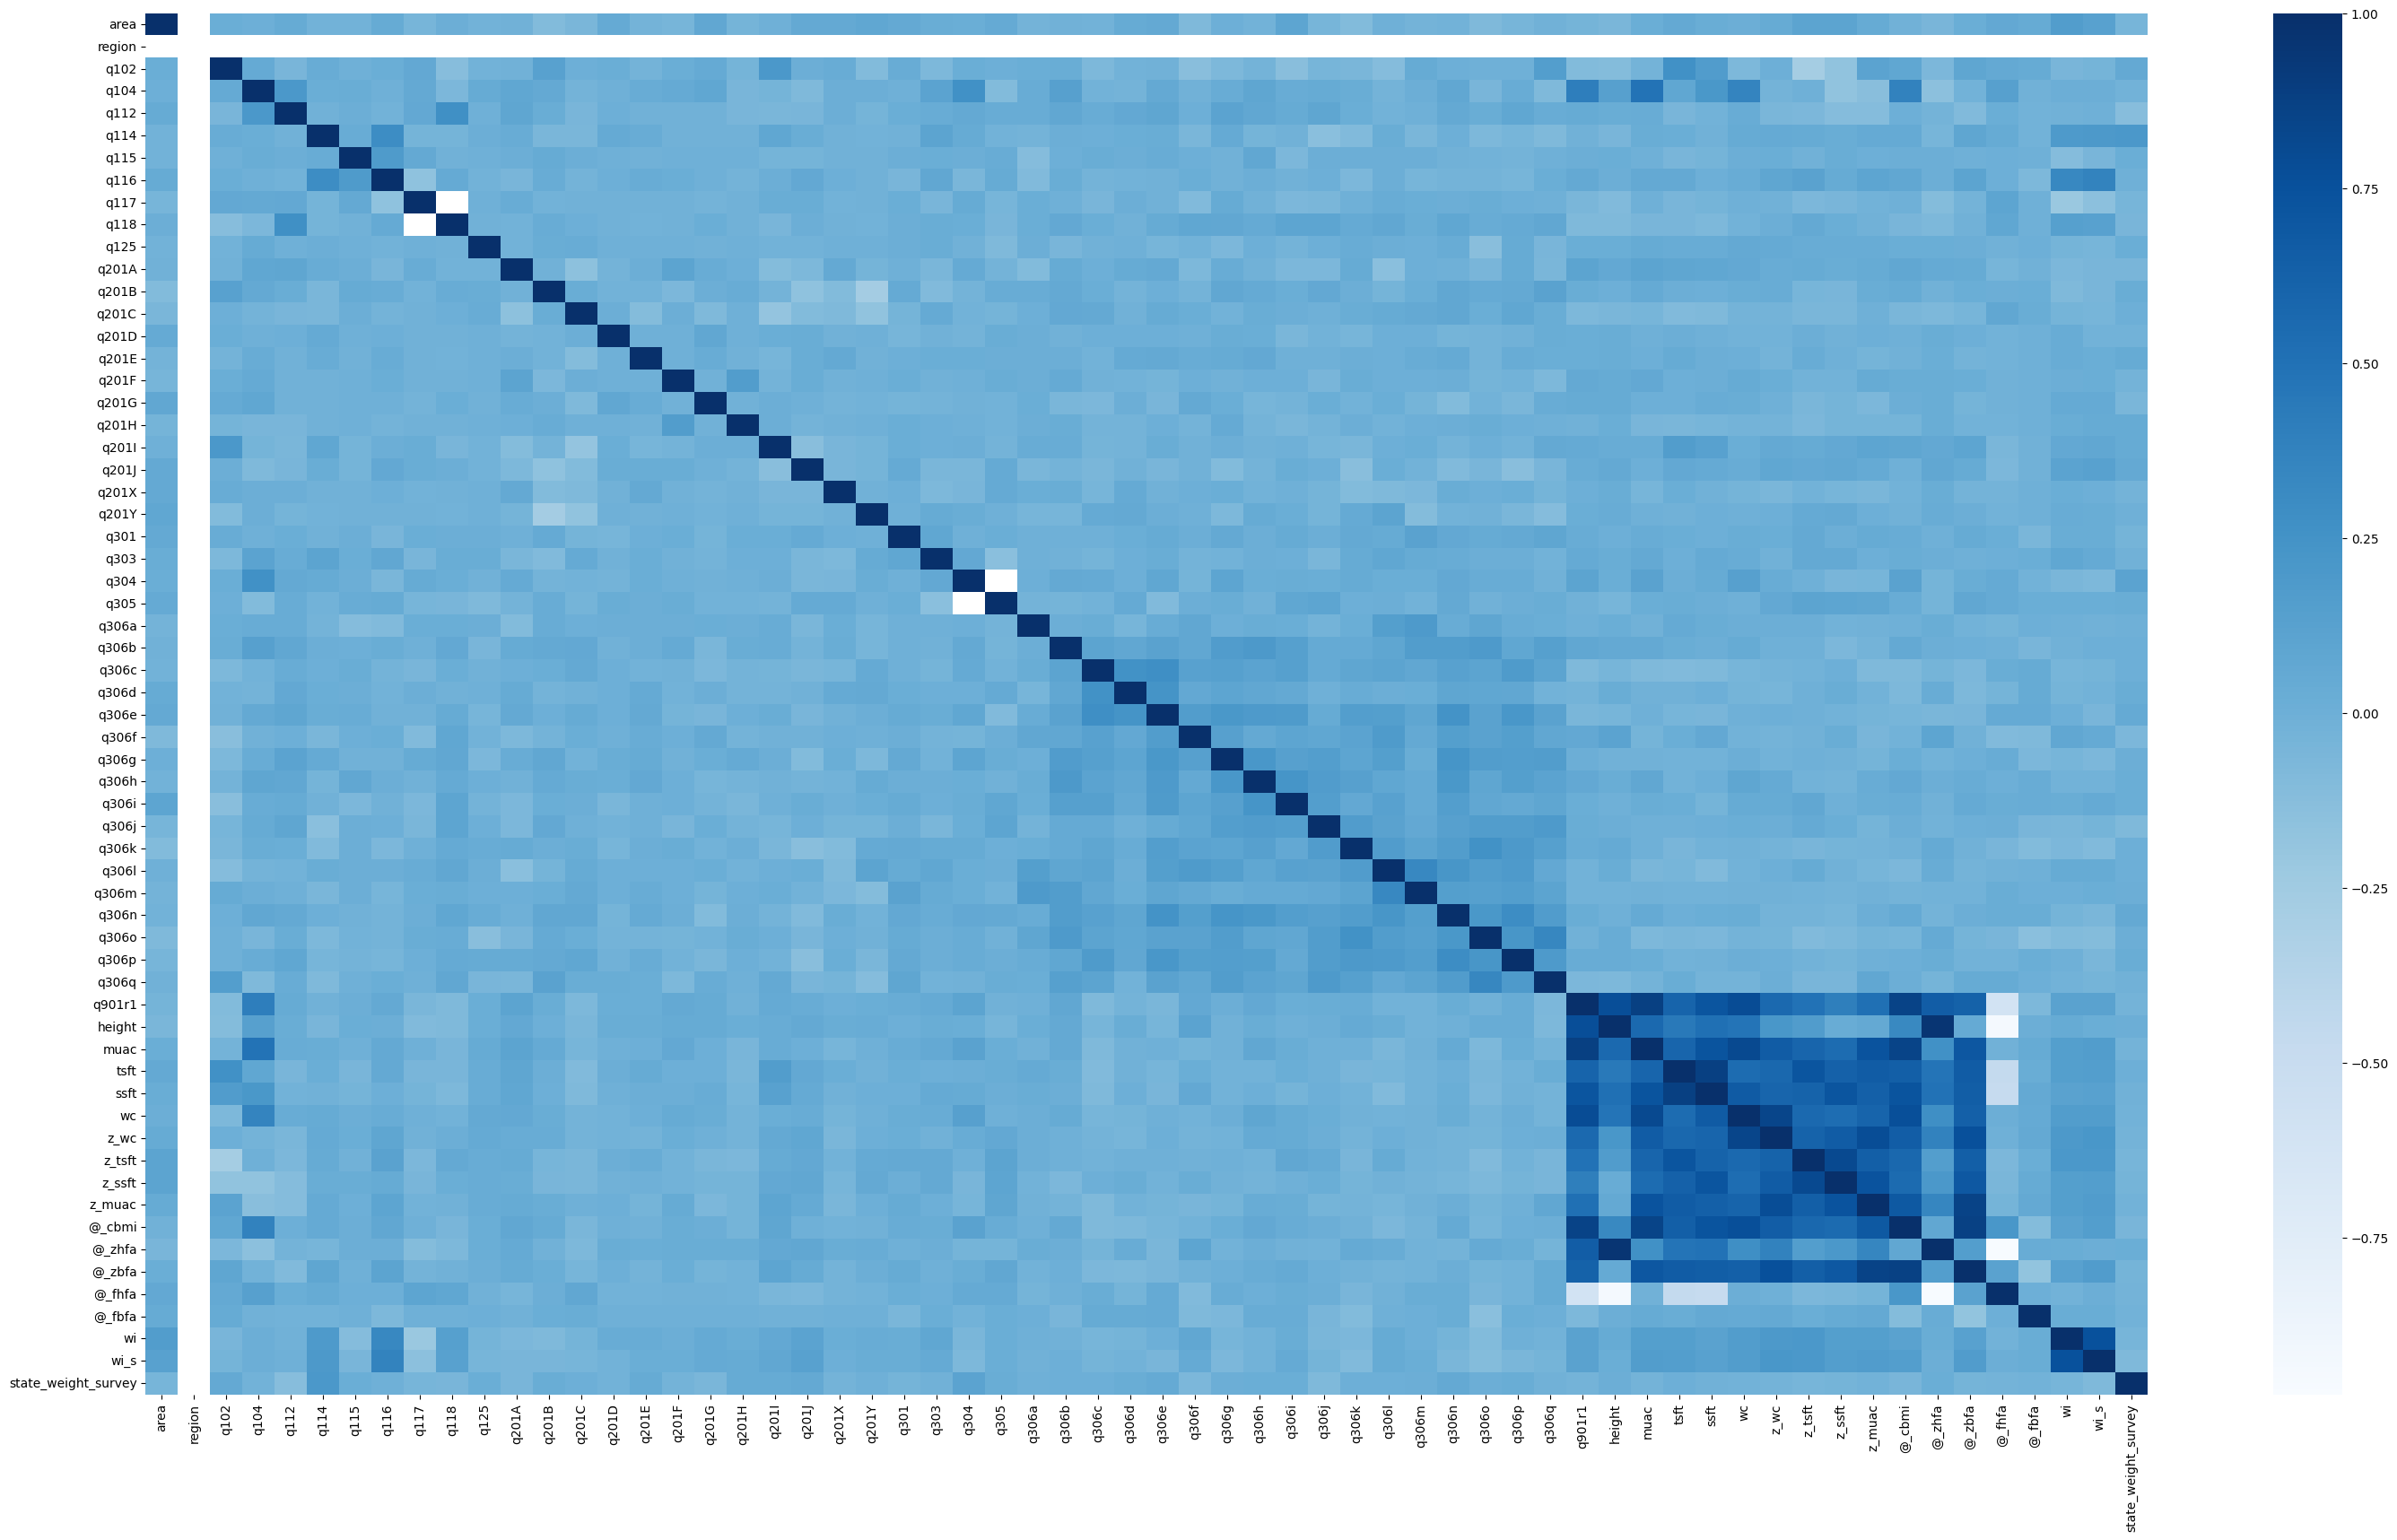

In [41]:
plt.figure(figsize=(36,20))
# sns.set_theme(style="white")
corr = kerala_data.corr(numeric_only=True)
# heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
heatmap = sns.heatmap(corr, cmap="Blues")

In [48]:
kerala_data.corr(numeric_only=True)['@_cbmi'].sort_values(ascending=False,key=abs)

@_cbmi                 1.000000
@_zbfa                 0.874730
q901r1                 0.853919
muac                   0.848325
wc                     0.765424
ssft                   0.725722
z_muac                 0.688737
z_wc                   0.659085
tsft                   0.640150
z_tsft                 0.572748
z_ssft                 0.545870
q104                   0.378428
height                 0.325597
@_fhfa                 0.220572
wi_s                   0.156060
wi                     0.118115
q304                   0.116603
@_fbfa                -0.107668
q201I                  0.087909
q306c                 -0.085821
q306d                 -0.079193
q102                   0.077087
q201A                  0.073238
q116                   0.071196
@_zhfa                 0.068542
q306l                 -0.067767
q201C                 -0.061194
q306h                  0.060231
q306b                  0.053395
q118                  -0.052673
state_weight_survey   -0.051005
q306n   

In [54]:
high_corr_wt = kerala_data.corr(numeric_only=True)['@_cbmi'].sort_values(ascending=False,key=abs)[:25].index
{item:meta.column_names_to_labels[item] for item in high_corr_wt}

{'@_cbmi': 'Calculated bmi=weight / squared(height)',
 '@_zbfa': 'BMI-for-age z-score',
 'q901r1': '901.weight in kg',
 'muac': 'Mean muac',
 'wc': 'Mean waist circumference',
 'ssft': 'Mean ssft',
 'z_muac': 'MUAC Z-score',
 'z_wc': 'Waist circumference Z-score',
 'tsft': 'Mean tsft',
 'z_tsft': 'TSFT Z-score',
 'z_ssft': 'SSFT Z-score',
 'q104': "q104: Index child's age",
 'height': 'Mean height',
 '@_fhfa': '=1 if (_zhfa < -6 | _zhfa >6)',
 'wi_s': 'Wealth Index for States',
 'wi': 'Wealth Index for India',
 'q304': 'q304. Have you consumed deworming tablets in the last six months?',
 '@_fbfa': '=1 if (_zbfa < -5 | _zfa >5)',
 'q201I': 'When it is important to wash hands with soap and water: After meal/food',
 'q306c': 'q306c. Days in week you consume - pulses or beans',
 'q306d': 'q306d. Days in week you consume - green leafy vegetables',
 'q102': 'q102: Sex of the respondent',
 'q201A': 'When it is important to wash hands with soap&water:Before cooking/handling food',
 'q116': 'q1

In [55]:
high_corr_wt

Index(['@_cbmi', '@_zbfa', 'q901r1', 'muac', 'wc', 'ssft', 'z_muac', 'z_wc',
       'tsft', 'z_tsft', 'z_ssft', 'q104', 'height', '@_fhfa', 'wi_s', 'wi',
       'q304', '@_fbfa', 'q201I', 'q306c', 'q306d', 'q102', 'q201A', 'q116',
       '@_zhfa'],
      dtype='object')

In [76]:
dependent_var = '@_cbmi'
ind_var = ['wi_s','q304','q201I', 'q306c', 'q306d', 'q102', 'q201A', 'q116','q306l','q306n']
variables_ww = ['@_cbmi','wi_s','q304','q201I', 'q306c', 'q306d', 'q102', 'q201A', 'q116','q306l','q306n','state_weight_survey']
variable_names = [meta.column_names_to_labels[item] for item in ind_var]
variable_names

['Wealth Index for States',
 'q304. Have you consumed deworming tablets in the last six months?',
 'When it is important to wash hands with soap and water: After meal/food',
 'q306c. Days in week you consume - pulses or beans',
 'q306d. Days in week you consume - green leafy vegetables',
 'q102: Sex of the respondent',
 'When it is important to wash hands with soap&water:Before cooking/handling food',
 'q116. Scheduled caste,scheduled tribe,other backward class,non-backward',
 'q306l. Days in week you consume - fats and oils',
 'q306n. Days in week you consume - fried foods']

In [89]:
regression_data = kerala_data[variables_ww].copy()
regression_data.dropna(inplace=True)

for column in variables_ww:
    print('\033[1m' + column + '\033[0m' + ': ' + meta.column_names_to_labels[column])
    print(meta.variable_measure.get(column))
    print(meta.value_labels.get(meta.variable_to_label.get(column)))
    if ( meta.value_labels.get(meta.variable_to_label.get(column)) != None or column == 'q201I' ):
        print(regression_data.groupby(column)[column].count())
    print('\n')

@_cbmi: Calculated bmi=weight / squared(height)
scale
None


wi_s: Wealth Index for States
nominal
{1.0: 'Poorest', 2.0: 'Poor', 3.0: 'Middle', 4.0: 'Rich', 5.0: 'Richest'}
wi_s
1.0    151
2.0    149
3.0    145
4.0    152
5.0    161
Name: wi_s, dtype: int64


q304: q304. Have you consumed deworming tablets in the last six months?
nominal
{1.0: 'yes', 2.0: 'no', 8.0: "don't know"}
q304
1.0    449
2.0    304
8.0      5
Name: q304, dtype: int64


q201I: When it is important to wash hands with soap and water: After meal/food
nominal
None
q201I
0.0    668
1.0     90
Name: q201I, dtype: int64


q306c: q306c. Days in week you consume - pulses or beans
nominal
{8.0: 'occasionally', 9.0: 'never'}
q306c
1.0     68
2.0    147
3.0    157
4.0     73
5.0     38
6.0      3
7.0    106
8.0    142
9.0     24
Name: q306c, dtype: int64


q306d: q306d. Days in week you consume - green leafy vegetables
nominal
{8.0: 'occasionally', 9.0: 'never'}
q306d
1.0     81
2.0    106
3.0     71
4.0     18
5.0     11
6

In [90]:
regression_data['q304'] = regression_data['q304'].replace([8,2],[None,0]) # 0 means did not consume deworming tablets
regression_data['q306c'] = regression_data['q306c'].replace([8,9],[0.4,0]) # Pulses or beans
regression_data['q306d'] = regression_data['q306d'].replace([8,9],[0.4,0]) # green leafy vegetables
regression_data['q102'] = regression_data['q102'].replace(2,0) # 0 is female
regression_data['q116'] = regression_data['q116'].replace([8,4],[None,0]) # 0 means general category
regression_data['q306l'] = regression_data['q306l'].replace([8,9],[0.4,0]) # fats and oils
regression_data['q306n'] = regression_data['q306n'].replace([8,9],[0.4,0]) # fried food

regression_data.dropna(inplace=True)
regression_data.reset_index(inplace=True,drop=True)

In [99]:
regression_data

,@_cbmi,wi_s,q304,q201I,q306c,q306d,q102,q201A,q116,q306l,q306n,state_weight_survey
0,12.916559,2.0,1.0,0.0,2.0,0.4,0.0,0.0,3.0,7.0,2.0,0.595384
1,16.334877,1.0,0.0,0.0,7.0,0.4,1.0,1.0,3.0,7.0,0.4,0.414343
2,21.944628,5.0,1.0,0.0,5.0,3.0,0.0,0.0,3.0,7.0,0.4,0.414343
3,18.486368,2.0,1.0,0.0,3.0,0.4,1.0,0.0,3.0,7.0,7.0,0.595384
4,17.995396,3.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,0.4,0.4,0.414343
...,...,...,...,...,...,...,...,...,...,...,...,...
746,20.231064,3.0,1.0,0.0,2.0,3.0,0.0,0.0,3.0,7.0,0.4,1.657160
747,18.454441,3.0,1.0,0.0,0.4,5.0,0.0,0.0,3.0,7.0,0.4,4.443621
748,18.846602,1.0,0.0,1.0,2.0,4.0,0.0,0.0,3.0,7.0,2.0,1.481207
749,17.382147,3.0,0.0,0.0,3.0,0.4,0.0,0.0,3.0,7.0,0.4,1.657160


# Density Estimation

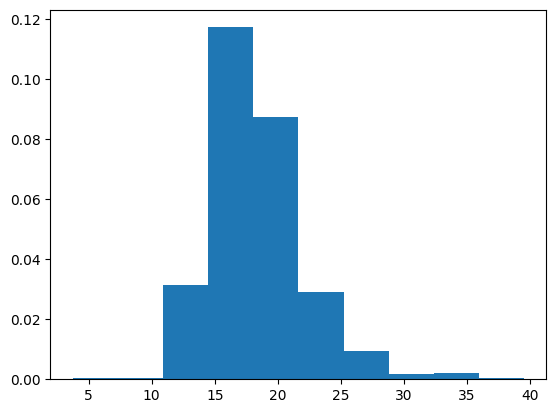

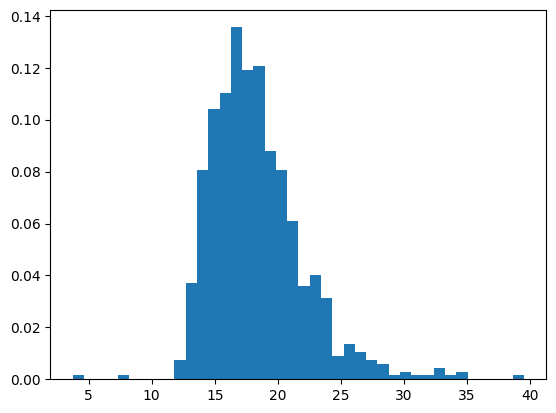

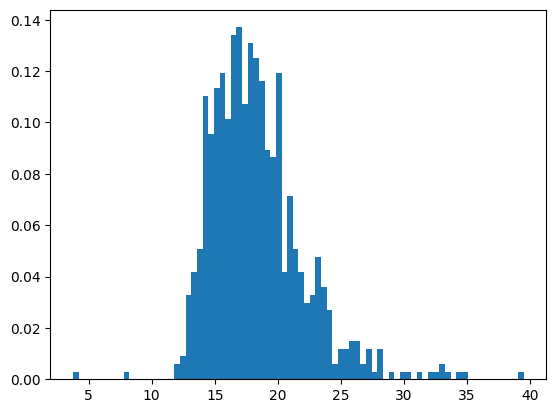

In [105]:
plt.hist(regression_data['@_cbmi'],density=True,bins=10)
plt.show()
plt.hist(regression_data['@_cbmi'],density=True,bins=40)
plt.show()
plt.hist(regression_data['@_cbmi'],density=True,bins=80)
plt.show()

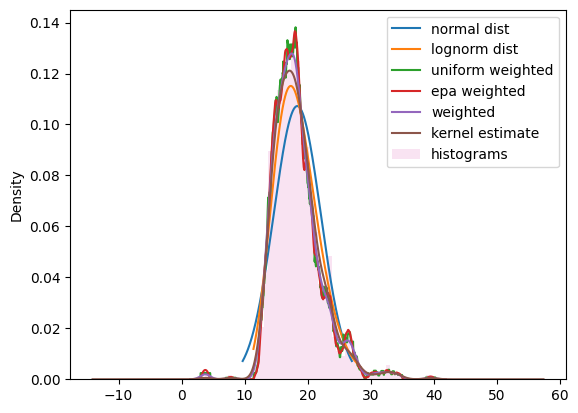

In [139]:
norm_mean = regression_data['@_cbmi'].mean()
norm_std = regression_data['@_cbmi'].std()
x = np.linspace(norm.ppf(0.01,loc=norm_mean,scale=norm_std),norm.ppf(0.99,loc=norm_mean,scale=norm_std), 1000)
plt.plot(x,norm.pdf(x,loc=norm_mean,scale=norm_std),label='normal dist')
logn_mean = np.log(regression_data['@_cbmi']).mean()
logn_std = np.log(regression_data['@_cbmi']).std()
ln_x = np.linspace(lognorm.ppf(0.01,s=logn_std,scale=np.exp(logn_mean)),lognorm.ppf(0.99,s=logn_std,scale=np.exp(logn_mean)), 1000)
plt.plot(ln_x,lognorm.pdf(ln_x,s=logn_std,scale=np.exp(logn_mean)),label="lognorm dist")
dens_uni = sm.nonparametric.KDEUnivariate(regression_data['@_cbmi']).fit(bw='silverman',kernel='uni',weights=regression_data['state_weight_survey'],fft=False)
dens_epa = sm.nonparametric.KDEUnivariate(regression_data['@_cbmi']).fit(bw='silverman',kernel='epa',weights=regression_data['state_weight_survey'],fft=False)
# plt.plot(dens_uni.support, dens_uni.density,label='uniform weighted')
# plt.plot(dens_epa.support, dens_epa.density, label='epa weighted')
dens = sm.nonparametric.KDEUnivariate(regression_data['@_cbmi']).fit(bw='silverman',kernel='gau',weights=regression_data['state_weight_survey'],fft=False)
plt.plot(dens.support, dens.density, label='weighted')
regression_data['@_cbmi'].plot.density(label='kernel estimate')
plt.hist(regression_data['@_cbmi'],bins=50,alpha=0.2,label='histograms',density=True)
plt.legend()
plt.show()

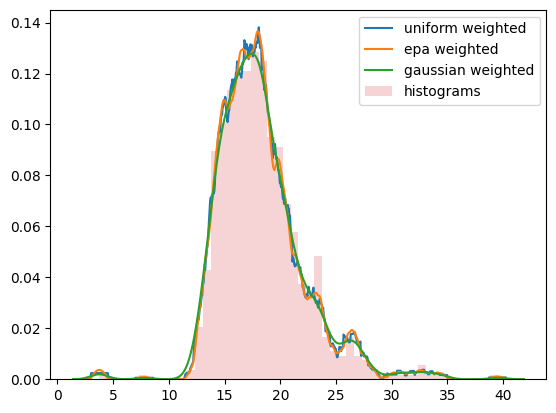

In [141]:
plt.plot(dens_uni.support, dens_uni.density,label='uniform weighted')
plt.plot(dens_epa.support, dens_epa.density, label='epa weighted')
plt.plot(dens.support, dens.density, label='gaussian weighted')
plt.hist(regression_data['@_cbmi'],bins=50,alpha=0.2,label='histograms',density=True)
plt.legend()
plt.show()

# Regression


In [175]:
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.diagnostic import het_white
from sklearn.metrics import mean_squared_error as MSE
reg_train, reg_test = tts(regression_data,random_state=20, test_size = 0.2)
X = sm.add_constant(reg_train[ind_var])
Y = reg_train[dependent_var]
WLS_reg = sm.WLS(Y,X,weights = reg_train['state_weight_survey'])
res_WLS = WLS_reg.fit()
print(res_WLS.summary())
#perform White's test
white_test = het_white(res_WLS.resid,  res_WLS.model.exog)
#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
#print results of White's test
print(dict(zip(labels, white_test)))
pred_WLS = res_WLS.predict(sm.add_constant(reg_test[ind_var]))
print("MSE of WLS:", MSE(reg_test[dependent_var],pred_WLS))
pred_WLS_in = res_WLS.predict(X)
print("MSE in-sample:",MSE(reg_train[dependent_var],pred_WLS_in))

                            WLS Regression Results                            
Dep. Variable:                 @_cbmi   R-squared:                       0.099
Model:                            WLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     6.498
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.48e-09
Time:                        12:34:25   Log-Likelihood:                -1662.0
No. Observations:                 600   AIC:                             3346.
Df Residuals:                     589   BIC:                             3394.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2357      0.609     28.290      0.0

In [146]:
{item:meta.column_names_to_labels[item] for item in ind_var}

{'wi_s': 'Wealth Index for States',
 'q304': 'q304. Have you consumed deworming tablets in the last six months?',
 'q201I': 'When it is important to wash hands with soap and water: After meal/food',
 'q306c': 'q306c. Days in week you consume - pulses or beans',
 'q306d': 'q306d. Days in week you consume - green leafy vegetables',
 'q102': 'q102: Sex of the respondent',
 'q201A': 'When it is important to wash hands with soap&water:Before cooking/handling food',
 'q116': 'q116. Scheduled caste,scheduled tribe,other backward class,non-backward',
 'q306l': 'q306l. Days in week you consume - fats and oils',
 'q306n': 'q306n. Days in week you consume - fried foods'}

In [158]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

# Define the range of k values to test
k_values = range(1, 21)
best_k = None
best_m = 100
for k in k_values:
    # Create KNN classifier with current k value
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(reg_train[ind_var], reg_train[dependent_var])
    
    # Make predictions on the test data
    y_pred = knn.predict(reg_test[ind_var])
    m = MSE(reg_test[dependent_var], y_pred)
    # Update the best k value and its corresponding accuracy if the current k value performs better
    if m < best_m:
        best_k = k
        best_m = m
        
# Print the best k value and its corresponding accuracy
print("Best k value:", best_k)
print("Best MSE:", best_m)


Best k value: 11
Best MSE: 12.591395115074869


In [173]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(reg_train[ind_var], reg_train[dependent_var])
pred_knn_in = knn.predict(reg_train[ind_var])
print("MSE in-sample:",MSE(reg_train[dependent_var], pred_knn_in))

MSE in-sample: 12.215174350920636


In [164]:
bw_ll = [1.90031937,  0.74106167,  0.13248323,  0.89086399,  2.76937895,  0.423655, 0.53975571,  0.62922874, 30.9225373,   8.42746269]
local_lin_reg = KernelReg(reg_train[dependent_var],reg_train[ind_var],'ouuccuuucc',bw=bw_ll)
fitted_ll, margin_ll = local_lin_reg.fit()
bw_lc = [0.74496653, 0.25847212, 0.06882867, 0.70855964, 1.89029046, 0.39059156, 0.06753075, 0.74766341, 1.86961878, 4.72221904]
local_const = KernelReg(reg_train[dependent_var],reg_train[ind_var],'ouuccuuucc',reg_type = 'lc', bw=bw_lc)
fitted_lc, margin_lc = local_const.fit()

In [167]:
pred_ll,m = local_lin_reg.fit(reg_test[ind_var])
pred_lc,m = local_const.fit(reg_test[ind_var])
print("MSE of Kern
      el_ll:", MSE(reg_test[dependent_var],pred_ll))
print("MSE of Kernel_lc:", MSE(reg_test[dependent_var],pred_lc))

MSE of Kernel_ll: 15.070238409178105
MSE of Kernel_lc: 14.21001341867831


In [176]:
# graph = Y.copy()
# graph['fit_ll']= fitted_ll
# graph['fit_lc']= fitted_lc

# sns.scatterplot(graph,x='fit_ll',y='q901r1')
# sns.scatterplot(graph,x='fit_lc',y='q901r1')